In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
from scipy import stats

%matplotlib inline

カーネル密度関数に関する説明
https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E5%AF%86%E5%BA%A6%E6%8E%A8%E5%AE%9A

(0.0, 1.0)

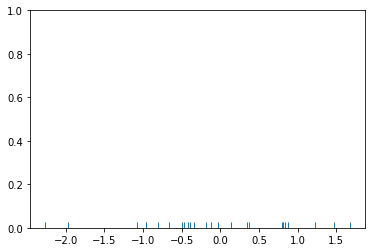

In [16]:
dataset = randn(25)
# rugplotを書きます
sns.rugplot(dataset)
plt.ylim(0, 1)

<AxesSubplot:>

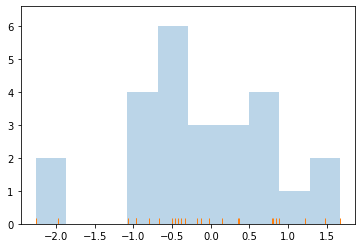

In [17]:
# ヒストグラムを重ねます。
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

バンド幅の推定<br>
http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

(0.0, 1.0)

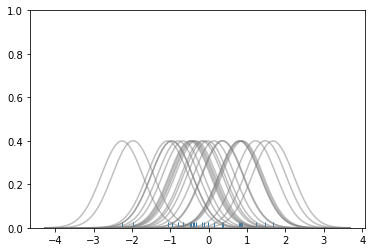

In [18]:
sns.rugplot(dataset)

# X軸を競ってい
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 全体を等間隔に100分割します。
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4 * dataset.std() ** 5) / (3 * len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:

    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color="grey", alpha=0.5)

plt.ylim(0, 1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

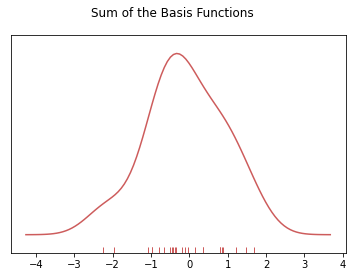

In [19]:
# 手動でKDEを作ります。
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color="indianred")

sns.rugplot(dataset, c="indianred")

plt.yticks([])

plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:ylabel='Density'>

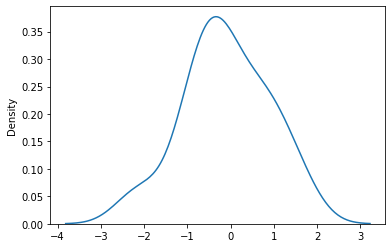

In [20]:
# これが1行で出来ます。
sns.kdeplot(dataset)

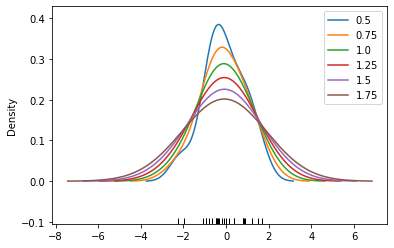

In [28]:
sns.rugplot(dataset, color="black")

# bw引数が無くなる予定なので、ほぼ同じ結果を得るコードに変更
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw_method=bw)

plt.legend(np.arange(0.5, 2, 0.25))

カーネル関数の説明（英語）<br>
http://en.wikipedia.org/wiki/Kernel_(statistics)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distri

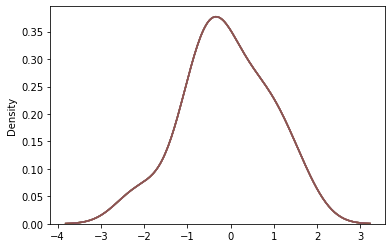

In [34]:
# Seaborn 0.11以降ではカーネルの変更を指示するkernel引数が無くなりました。
# すべてガウシアンカーネルを使った同じ曲線が描画されます。
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distri

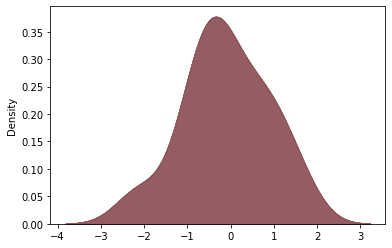

In [36]:
# こちらも同様です。
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True, alpha=0.5)

<AxesSubplot:xlabel='Density'>

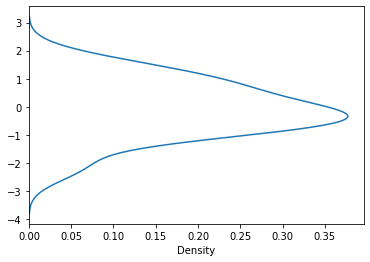

In [39]:
# 軸を入れ替えることもできます。
#sns.kdeplot(dataset, vertical=True)
# 軸を入れ替えるときのコードの書き方が変わりました。
sns.kdeplot(y=dataset)

cumulative distribution function (CDF)<br>
累積分布関数<br>
http://en.wikipedia.org/wiki/Cumulative_distribution_function

(array([ 2.,  2.,  2.,  6., 12., 15., 18., 22., 23., 25.]),
 array([-2.26158231, -1.86815531, -1.4747283 , -1.08130129, -0.68787428,
        -0.29444727,  0.09897973,  0.49240674,  0.88583375,  1.27926076,
         1.67268776]),
 <BarContainer object of 10 artists>)

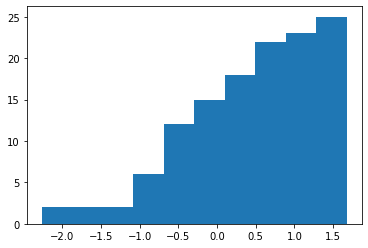

In [40]:
plt.hist(dataset, cumulative=True)

<AxesSubplot:ylabel='Density'>

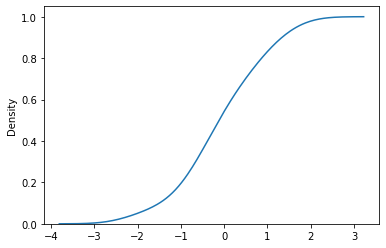

In [41]:
sns.kdeplot(dataset, cumulative=True)

<AxesSubplot:xlabel='X', ylabel='Y'>

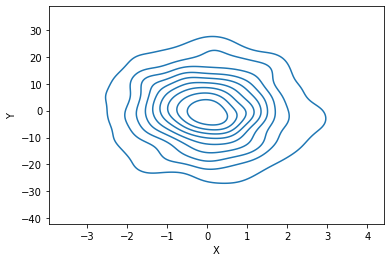

In [43]:
# 2次元平面上の中心
mean = [0, 0]
# それぞれの分散を決めます。
cov = [[1, 0], [0, 100]]
# これに従う多変量正規分布
dataset2 = np.random.multivariate_normal(mean, cov, 1000)
# DataFrameにしておきましょう。
dframe = pd.DataFrame(dataset2, columns=["X", "Y"])
# プロットします。SeabornとPandasの相性は抜群
#　ｘとｙを具体的に指定するように変更されました。
sns.kdeplot(data=dframe, x='X', y='Y')

<AxesSubplot:xlabel='X', ylabel='Y'>

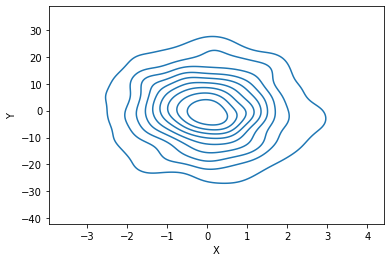

In [45]:
# 軸ごとにデータをわたせます。
# sns.kdeplot(dframe.X, dframe.Y)
# 明示的に軸を指定する必要があります。
sns.kdeplot(x=dframe.X, y=dframe.Y)

<AxesSubplot:xlabel='X', ylabel='Y'>

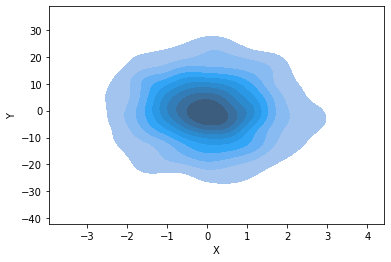

In [47]:
# 軸ごとにデータをわたせます。
# sns.kdeplot(dframe.X, dframe.Y, shade=True)
# こちらも同様です。
sns.kdeplot(x=dframe.X, y=dframe.Y, shade=True)

<AxesSubplot:xlabel='X', ylabel='Y'>

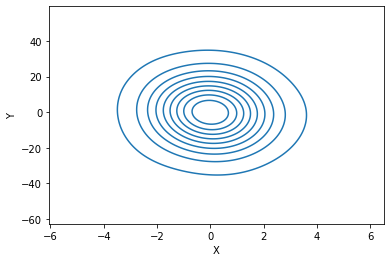

In [51]:
# バンド幅を変えられます。
# sns.kdeplot(dframe, bw=1)
# 引数が変更になりました。
sns.kdeplot(data=dframe, x='X', y='Y', bw_method=1)

<AxesSubplot:xlabel='X', ylabel='Y'>

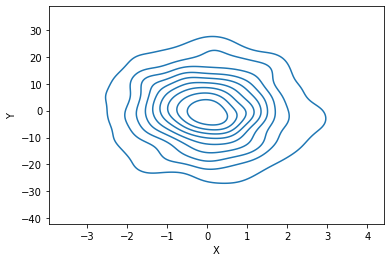

In [54]:
# 文字列でも渡せます。
# こちらも同様です。
sns.kdeplot(data=dframe, x='X', y='Y', bw="silverman")

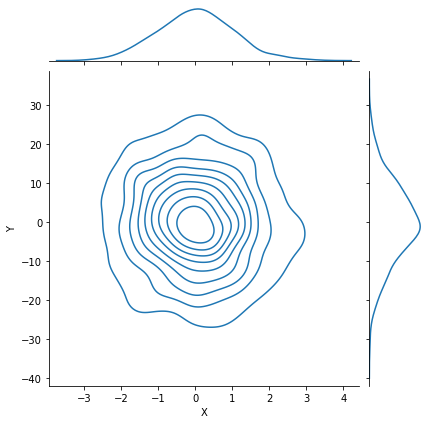

In [58]:
# 同時分布の推定も可能です。
# ここでも明示的に指定したほうがよいです。
sns.jointplot(data=dframe, x='X', y='Y', kind="kde")